# MNIST Dataset classification


in this module we will be useing the MNIST  dataset, which is a set of 70000 small images of digits handwritten by high school students and employees of the US cencus Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it si often called the " Hello world " of Machile Learning.

## 1.1 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1.1 Imprting dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y =  mnist['data'], mnist['target']

In [5]:
# y is stored  as string values ...y[100]='5'
# so, make it int using /arr.astype(uint8)/

y = y.astype(np.uint8)

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

### ploting an image

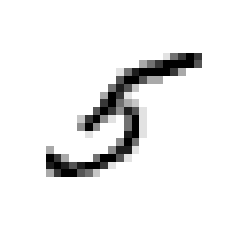

In [7]:
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary , interpolation="nearest" )
plt.axis("off")
plt.show()

### data splitting test and train

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[:10000], y[:60000], y[:10000]

# Training Models for Prediction of 5s

In [9]:
y_train_5 = (y_train == 5)  #True for all 5 and false for not 5
y_test_5 = (y_test == 5)

In [10]:
# using Stochastic Gradient Descent on binary Classification of number 5
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
# Finding the CrossValidation Score 

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [13]:
# Dont get excited to see this 96% accuracy because even if it only predicts all the values to be 0 then also it will have 90% , 10% data is 5
# The more better way to cal the profeciency is to calculate the confussion matrix

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision Recall and F1 Score

In [14]:
# Precision Score: TP/(TP+FP)
# Recall Score: TP/(TP+FN)
# F1 Score: harmonic mean of ps and rs ...2/((1/pre)+(1/rec))

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))
print("F1 :", f1_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311
F1 : 0.7325171197343846


### Precision Recall Tradeoff

In [15]:
# return desicison score instead of prediction 

y_score = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


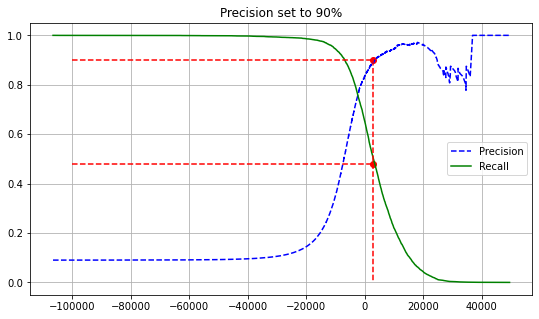

In [16]:
from sklearn.metrics import precision_recall_curve

precision, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

plt.figure(figsize=(9,5))
plt.plot(thresholds, precision[:-1],"b--", label="Precision")
plt.plot(thresholds, recalls[:-1],"g-", label="Recall")
plt.scatter([2800],[0.9],c="r")
plt.scatter([2800],[0.479],c="r")
plt.plot([-100000,2800],[0.9,0.9],"r--")
plt.plot([-100000,2800],[0.479,0.479],"r--")
plt.plot([2800,2800],[0.9,0],"r--")
plt.title("Precision set to 90%")
plt.legend()
plt.axis("on")
plt.grid("on")
plt.show()

#### Aim for precision 90%

In [17]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]

#prediction calculation directly from decision function method
y_train_pred_90 = (y_score >= threshold_90_precision)


In [18]:
print(
    precision_score(y_train_5, y_train_pred_90),
    recall_score(y_train_5, y_train_pred_90)
)

0.9000345901072293 0.4799852425751706


### Precision v/s Recall curve

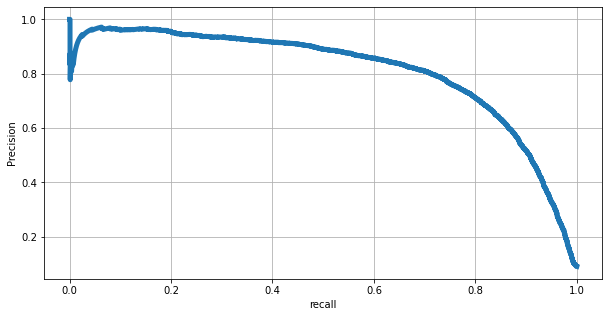

In [19]:
plt.figure(figsize=(10,5))
plt.plot(recalls, precision, linewidth=5)
plt.xlabel("recall")
plt.ylabel("Precision")
plt.grid("on")

### ROC Curve <sub>(Reciever Operating Characterstic)</sub>
<hr>

Same as precision vs recall but use TPR(Total Positve Rate) and FPR (False Positive Rate).

• TPR : another name of recall (Sensitivity) <br>
• FPR : Ratio of -ve instances incorrectly classified as +ve <br> 
• FPR : 1-TNR <br>
• TNR : Specificity


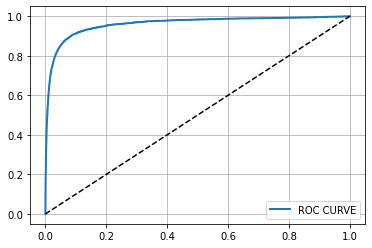

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train_5, y_score)

plt.plot(fpr, tpr, linewidth=2, label= "ROC CURVE")
plt.plot([0, 1],[0, 1], 'k--', )
plt.legend()
plt.grid("on")
plt.show()

### ROC - AUC
This is ROC Area Under Curve <br>
A perfect
classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9604938554008616

## RandomForestClassifier - ROC and AUC

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [23]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

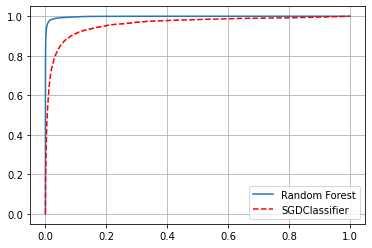

In [24]:
# ROC CURVE PLOTTING

plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot(fpr, tpr,"r--", label="SGDClassifier")
plt.legend()
plt.grid("on")
plt.show()

In [25]:
# ROC AUC SCORE 

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# !!! 🤔🤓 GOT 99% ACCURACY WITH RANDOM-FOREST....

<hr>

## Recap, How to train Binary Classifiers...📝
#### Choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/ recall tradeoff that fits your needs, and compare various models using ROC curves and ROC AUC scores.

<hr>

# Multiclass Classification

1. One Vs All Classifier
2. One Vs One Classifier<br>
...they are methods to train binary classifiers as multiclass classifier

### Train it with SGDClassifier

In [26]:
sgd_clf.fit(X_train, y_train) #It is just simple as that for some classifiers.. but not for all

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict([some_digit]) #Predicting the some_digit

array([5], dtype=uint8)

<i>Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO).</i>

In [28]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score  #The highest score is indeed the one corresponding to class 5:

array([[-14400.67322862, -11585.51697742,  -7766.21413227,
          -482.92574848, -10954.47634734,    588.01312633,
        -23848.72014809, -13492.71061272,  -2651.17639341,
        -10108.09543083]])

In [29]:
# To get the list of probablities
#.
# forest_clf.predict_proba([some_digit])

# works well for forest classifier

### Training over scaled data

In [ ]:
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# 
# takes too much time to run....just leave it,
# OUTPUT:  80% Accuracy 

In [32]:
# cant run completely due to performance issue
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# OUTPUT : 90% Accuracy
# just by scaling, you can increase the accuracy by 10%

## Error Analysis

<i> we cant just run these codes due to performance issue.<br>  We are just limited to only Binary Class Functions and Multiclass are just beyond the scope of this meachine. 😞</i>

In [58]:
# y_train_pred = cross_val_predict(sgd_clf, X_train_scaled)
# conf_mx = confusion_matrix( y_train, y_train_pred )
conf_mx = np. array([[5578, 0, 22, 7, 8, 45, 35, 5, 222, 1],
[ 0, 6410, 35, 26, 4, 44, 4, 8, 198, 13],
[ 28, 27, 5232, 100, 74, 27, 68, 37, 354, 11],
[ 23, 18, 115, 5254, 2, 209, 26, 38, 373, 73],
[ 11, 14, 45, 12, 5219, 11, 33, 26, 299, 172],
[ 26, 16, 31, 173, 54, 4484, 76, 14, 482, 65],
[ 31, 17, 45, 2, 42, 98, 5556, 3, 123, 1],
[ 20, 10, 53, 27, 50, 13, 3, 5696, 173, 220],
[ 17, 64, 47, 91, 3, 125, 24, 11, 5421, 48],
[ 24, 18, 29, 67, 116, 39, 1, 174, 329, 5152]])

# making predictions using SGDClassifier
# finding the confusion matrix
#...here manually adding the data...

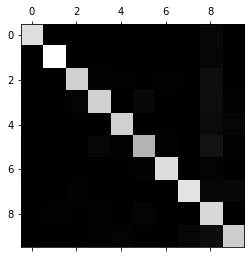

In [59]:
plt.matshow(conf_mx, cmap = mpl.cm.gray)
plt.show()

The confusion matrix is just not valid as it depends on no of total entries of number present in the data. so, divide each value in the confusin matrix by the number for images in the corresponding class, so you can compare error rates instead of absolute number of errors

In [60]:
# Removing the bais of the confusion matrix

row_sums = conf_mx.sum(axis=1, keepdims=True)  #keepDimension is important as it returns a linear vector sum of all rows while we need sum stored beside each row so, keeping dimension as it is.
norm_conf_mx = conf_mx / row_sums

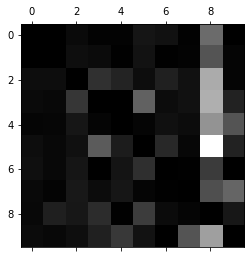

In [61]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


Remember that rows represent actual classes, while columns represent predicted classes. 

# 🥱Here we end up...



#### sklearn.model_selection : 
    • cross_val_score
    • cross_val_pred
#### sklearn.model_matrics:
    .• confussion_matrix
     • precision_score
     • recall_score
     • f1_score
     • precision_recall_curve
     • roc_curve
     • roc_auc_score
#### sklearn.ensemble:
     • RandomForestClassifier
     
#### sklearn.multiclass: 
     • OneVsOneClassifier

#### sklearn.preprocessing: 
     • StandardScaler